# ZYFRA. Gold production optimization

## Contents <a id='back'></a>

* [Introducción](#intro) 
* [1. Data exploration](#data_review)
* [2. Preprocessing of data](#data_preprocessing)
* [3. Data standardization](#standardization)
* [4. EDA](#eda)
* [5. Prediction model evaluation](#model_evaluation)
* [6. Model with test set](#test_set)
* [Conclusions](#end)

## Introduction <a id='intro'></a>

ZYFRA is dedicated to the extraction and purification of precious metals such as gold. First, the ore is extracted to be subjected to a primary treatment to obtain the ore mix, or rougher feed, which is the raw material used for flotation (also known as rougher process). After flotation, the material undergoes the two-stage purification process. 

## Objectives

Design a prototype of a machine learning model for Zyfra to develop efficiency solutions for heavy industry and predict the amount of gold extracted from gold ore.

[Back to Contents](#back)

## 1. Data exploration <a id='data_review'></a>

### Open the files and examine them

In [1]:
# The necessary libraries are imported

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [2]:
# Files are opened

data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# Data are read and examined.

data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In this case we can observe that in the 3 DataFrames are indexed with the date that indicates the acquisition of minerals, however this column has a type 'object' which is incorrect and must be changed to 'datetime64'. It can also be observed that in different columns of the 3 DataFrames there are missing elements, so it is possible to sort the dates in chronological order and as the parameters close in time are similar, taking advantage of this we could fill with the previous data to eliminate the missing data.

[Back to Contents](#back)

## 2. Preprocessing of data  <a id='data_preprocessing'></a>

In [9]:
# The data type of the column is corrected.
data['date']=pd.to_datetime(data['date'],format= '%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

In [10]:
# Dates are arranged in a chronological manner
data=data.sort_values(by='date', ascending= True).reset_index(drop=True)
data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [11]:
data= data.ffill()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

In [12]:
# The same process is repeated for the other two DataFrames.
data_train['date']=pd.to_datetime(data_train['date'],format= '%Y-%m-%d %H:%M:%S')


In [13]:
# Dates are arranged in a chronological manner
data_train=data_train.sort_values(by='date', ascending= True).reset_index(drop=True)
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [14]:
data_train= data_train.bfill()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

In [15]:
data_test['date']=pd.to_datetime(data_test['date'],format= '%Y-%m-%d %H:%M:%S')


In [16]:
# Se acomodan las fechas de manera cronológicamente
data_test=data_test.sort_values(by='date', ascending= True).reset_index(drop=True)
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [17]:
data_test= data_test.ffill()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

As we mentioned we have time data, that is why when we order them by date we serialize them and we can make the prediction of what is going to happen in the next moment, which is the same as what happened in the previous one because the data of the parameters close in time are usually similar, so we used the method "forward fill" or ffill(), this means that it is filled forward, managing to fill the absent ones and in this way they were eliminated.

Now for future model application calculations, we can observe that both training data and test data have different columns, which may cause errors when testing the model in test datasets, since they cannot have different columns, so set operations will be used to select the intersection of columns in both datasets. Initially the targets 'rougher.output.recovery' and 'final.output.recovery' will be added to the test set.

In [18]:
# The target columns 'rougher.output.recovery' and 'final.output.recovery' are added to the test set:
data_select= data[['date','rougher.output.recovery', 'final.output.recovery']]
data_test=data_test.merge(right=data_select, on='date', how= 'left')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

[Back to Contents](#back)

## 3. Data standardization <a id='standardization'></a>

In [19]:
# The two sets of training and testing are established
cols_train= set(data_train.columns.values)
cols_test = set(data_test.columns.values)

# The intersection operation is performed to know which columns are in both sets.
cols_inter = cols_train.intersection(cols_test)
cols_inter

{'date',
 'final.output.recovery',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.recovery',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.fl

In [20]:
data_filtered_test = data_test[cols_inter]
data_filtered_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   primary_cleaner.input.depressant            5856 non-null   float64       
 1   secondary_cleaner.state.floatbank3_a_level  5856 non-null   float64       
 2   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64       
 3   rougher.state.floatbank10_c_air             5856 non-null   float64       
 4   rougher.state.floatbank10_e_air             5856 non-null   float64       
 5   secondary_cleaner.state.floatbank2_a_air    5856 non-null   float64       
 6   secondary_cleaner.state.floatbank3_b_level  5856 non-null   float64       
 7   secondary_cleaner.state.floatbank5_a_level  5856 non-null   float64       
 8   primary_cleaner.input.feed_size             5856 non-null   float64       
 9   rougher.

In [21]:
data_filtered_test.head()

,primary_cleaner.input.depressant,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.state.floatbank8_c_air,rougher.state.floatbank10_c_air,rougher.state.floatbank10_e_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank5_a_level,primary_cleaner.input.feed_size,rougher.input.floatbank11_sulfate,...,secondary_cleaner.state.floatbank4_a_level,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank2_b_level,date
0,14.993118,-450.395995,1400.102998,1249.750520,999.472250,24.938200,-449.831513,-432.317850,8.080000,16.867518,...,-497.795834,-499.919735,5.636710,489.793655,62.710452,20.018166,8.016656,7.946562,-500.013837,2016-09-01 00:59:59
1,14.987471,-450.114024,1396.151033,1249.514451,1000.002114,24.923466,-450.059163,-525.839648,8.080000,16.996063,...,-498.695773,-499.778182,5.526065,490.104534,61.961163,19.988503,8.130979,7.958270,-500.764452,2016-09-01 01:59:59
2,12.884934,-450.263164,1398.075709,1248.207204,999.925519,24.908732,-449.660997,-500.801673,7.786667,16.982096,...,-498.767484,-499.764529,5.426561,489.617969,66.903807,20.039689,8.096893,8.071056,-500.993821,2016-09-01 02:59:59
3,12.006805,-449.372570,1400.129303,1250.493702,1001.930679,24.893998,-449.526900,-500.868509,7.640000,16.515277,...,-498.350935,-499.211024,5.114758,476.618130,59.865919,20.031100,8.074946,7.897085,-499.862299,2016-09-01 03:59:59
4,10.682530,-450.638828,1402.172226,1306.455515,1058.839106,24.886905,-450.022259,-509.526725,7.530000,13.650053,...,-500.786497,-499.504543,4.767383,488.248117,63.315324,19.962364,8.054678,8.107890,-500.186804,2016-09-01 04:59:59


#### Recovery calculation

In this case we can see that the variables necessary to calculate the recovery have values equal to 0, so that if any division with values equal to zero were to be performed, it would generate infinite positive and negative data or missing data, so it was decided to add 0.000001 to all the data.

In [22]:
# A function is defined to calculate the recovery of metals, where the variables c,f,t are defined.

def recovery_au(c,f, t):
    recovery= ((c*(f-t))/(f*(c-t)))*100
    return recovery

# Variables are defined

c_au_rougher= (data_train['rougher.output.concentrate_au'])+0.000001
f_au_rougher= (data_train['rougher.input.feed_au'])+0.000001
t_au_rougher= (data_train['rougher.output.tail_au'])+0.000001

recovery_rougher=recovery_au(c_au_rougher, f_au_rougher, t_au_rougher)
recovery_rougher

0        87.107754
1        86.843251
2        86.842299
3        87.226420
4        86.688783
           ...    
16855    89.574364
16856    87.723994
16857    88.890565
16858    89.858110
16859    89.514944
Length: 16860, dtype: float64

In [23]:
data_train['recovery.predictions'] = recovery_rougher

In [24]:
data_train= data_train.bfill()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

It is generally observed that the data are no longer absent.

In [25]:
data_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [26]:
data_train['recovery.predictions'].head()

0    87.107754
1    86.843251
2    86.842299
3    87.226420
4    86.688783
Name: recovery.predictions, dtype: float64

In [27]:
data_train['recovery.predictions'].describe()

count    1.686000e+04
mean    -8.316358e+05
std      2.164739e+07
min     -1.683860e+09
25%      8.020403e+01
50%      8.607530e+01
75%      9.163744e+01
max      2.229158e+08
Name: recovery.predictions, dtype: float64

It can be verified that the calculation of the gold recovery is correct, obtaining calculated values similar to those that we have in the data that we will consider our target, however, we can observe that the maximum and minimum values are outliers. For this reason it is proposed to make an adjustment where the minimum recovery value is 0% and the maximum recovery value is 100%.

In [28]:
# The limits of the prediction values 0 and 100 % are adjusted.
data_train[data_train['recovery.predictions']<=0]=0
data_train[data_train['recovery.predictions']>=100]=100
data_train['recovery.predictions'].describe()

count    16860.000000
mean        82.814079
std         18.365253
min          0.000000
25%         80.204031
50%         86.075297
75%         91.637442
max        100.000000
Name: recovery.predictions, dtype: float64

In [29]:
data_train['rougher.output.recovery'].describe()

count    16860.000000
mean        82.872040
std         18.248741
min          0.000000
25%         80.167524
50%         86.092835
75%         91.641079
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [30]:
# Calculates the EAM
def mae(target,predictions):
    error_mae=mean_absolute_error(target,predictions)

    return error_mae

target_train_rougher = data_train['rougher.output.recovery']
predictions_train_rougher = data_train['recovery.predictions']

mae(target_train_rougher,predictions_train_rougher)

    

0.27074200148552585

With the proposed adjustments, a mean absolute error of 0.27 was obtained, which could be considered good.

[Back to Contents](#back)

## 4. EDA <a id='eda'></a>

#### Behavior of metal concentration (Au, Ag, Pb) as a function of purification stage.

In [31]:

# The average gold concentration in different parts of the process are represented.
print('La concentración de oro después de la flotación es: '+str(data_train['rougher.output.concentrate_au'].mean()))
print('La concentración de oro después de la primera etapa de purificación: '+str(data_train['primary_cleaner.output.concentrate_au'].mean()))
print('La concentración de oro después de la segunda etapa de purificación: '+str(data_train['final.output.concentrate_au'].mean()))

La concentración de oro después de la flotación es: 27.230078085842205
La concentración de oro después de la primera etapa de purificación: 37.788263330222875
La concentración de oro después de la segunda etapa de purificación: 47.64140872644537


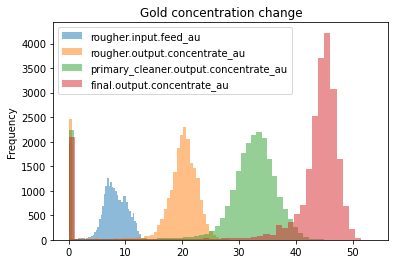

In [32]:
# Se representa mediante un histograa la concentración de oro en las diferentes etapas del proceso.

data['rougher.input.feed_au'].plot(kind='hist', bins=50, title= 'Gold concentration change',alpha = 0.5), data['rougher.output.concentrate_au'].plot(kind='hist', bins=50, title= 'Gold concentration change',alpha = 0.5), data['primary_cleaner.output.concentrate_au'].plot(kind='hist', bins=50, title= 'Gold concentration change',alpha = 0.5), data['final.output.concentrate_au'].plot(kind='hist', bins=50, title= 'Gold concentration change',alpha = 0.5)
plt.legend()
plt.show()

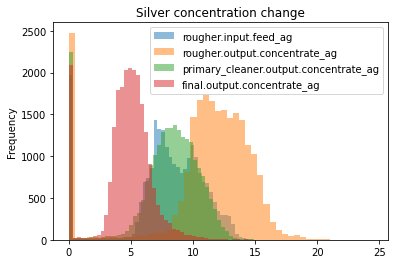

In [33]:
# The concentration of silver in the different stages of the process is represented by a histogram.

data['rougher.input.feed_ag'].plot(kind='hist', bins=50, title= 'Silver concentration change',alpha = 0.5), data['rougher.output.concentrate_ag'].plot(kind='hist', bins=50, title= 'Silver concentration change',alpha = 0.5), data['primary_cleaner.output.concentrate_ag'].plot(kind='hist', bins=50, title= 'Silver concentration change',alpha = 0.5), data['final.output.concentrate_ag'].plot(kind='hist', bins=50, title= 'Silver concentration change',alpha = 0.5)
plt.legend()
plt.show()

In [34]:
# The average lead concentration in different parts of the process are represented.

print('La concentración de plomo después de la flotación es: '+str(data['rougher.output.concentrate_pb'].mean()))
print('La concentración de plomo después de la primera etapa de purificación: '+str(data['primary_cleaner.output.concentrate_pb'].mean()))
print('La concentración de plomo después de la segunda etapa de purificación: '+str(data['final.output.concentrate_pb'].mean()))

La concentración de plomo después de la flotación es: 6.886869464260839
La concentración de plomo después de la primera etapa de purificación: 8.809217456953881
La concentración de plomo después de la segunda etapa de purificación: 9.071366208756318


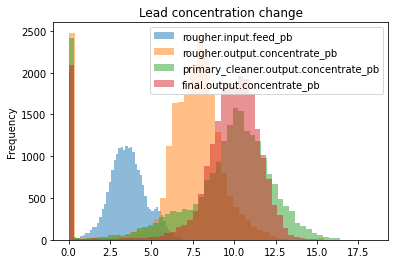

In [35]:
# The concentration of lead in the different stages of the process is represented by a histogram.

data['rougher.input.feed_pb'].plot(kind='hist', bins=50, title= 'Lead concentration change',alpha = 0.5), data['rougher.output.concentrate_pb'].plot(kind='hist', bins=50, title= 'Lead concentration change',alpha = 0.5), data['primary_cleaner.output.concentrate_pb'].plot(kind='hist', bins=50, title= 'Lead concentration change',alpha = 0.5), data['final.output.concentrate_pb'].plot(kind='hist', bins=50, title= 'Lead concentration change',alpha = 0.5)
plt.legend()
plt.show()

We can observe that depending on the purification stages, the average concentration of gold varies, increasing the concentration of this metal as the purification process advances, while the average concentration of silver decreases, now in lead the average concentration is maintained with equal or similar values in the purification process. This can be observed graphically, a histogram was obtained with the data of each one of the metals, the only one that has an ascending behavior is gold.

#### Comparison of feed particle sizes

Compare the particle size distributions of the feed particles in the training set and in the test set. If the distributions vary significantly, the model evaluation will not be correct.

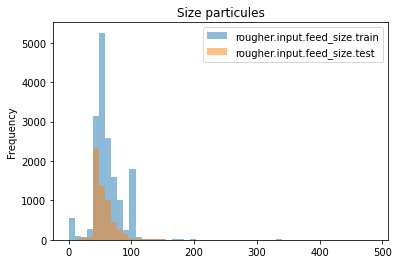

In [36]:
# The dispersion of particle sizes in the process feed is graphically represented by a histogram.

data_train['rougher.input.feed_size.train']= data_train['rougher.input.feed_size']
data_test['rougher.input.feed_size.test']= data_test['rougher.input.feed_size']

data_train['rougher.input.feed_size.train'].plot(kind='hist', bins=50, title= 'Size particules',alpha = 0.5), data_test['rougher.input.feed_size.test'].plot(kind='hist', bins=50, title= 'Size particules',alpha = 0.5)
plt.legend()
plt.show()

From the graph we can see that the distribution of the feed particle sizes in both the training data set and the test set are in a similar particle size range, so there is a high probability that the model evaluation is correct.

In [37]:
data_train['rougher.feed']=data_train['rougher.input.feed_ag']+data_train['rougher.input.feed_au']+data_train['rougher.input.feed_pb']+data_train['rougher.input.feed_rate']+data_train['rougher.input.feed_size.train']+data_train['rougher.input.feed_sol']
data_train['rought.output']=data_train['rougher.output.concentrate_ag']+data_train['rougher.output.concentrate_au']+data_train['rougher.output.concentrate_pb']+data_train['rougher.output.concentrate_sol']+data_train['rougher.output.recovery']+data_train['rougher.output.tail_ag']+data_train['rougher.output.tail_au']+data_train['rougher.output.tail_pb']+data_train['rougher.output.tail_sol']
data_train['final.output']=data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_au']+data_train['final.output.concentrate_pb']+data_train['final.output.concentrate_sol']+data_train['final.output.recovery']+data_train['final.output.tail_ag']+data_train['final.output.tail_au']+data_train['final.output.tail_pb']+data_train['final.output.tail_sol']

data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery.predictions,rougher.input.feed_size.train,rougher.feed,rought.output,final.output
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107754,55.486599,630.712958,179.373999,164.540466
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843251,57.278666,633.228361,179.498100,163.473493
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842299,57.510649,638.147188,178.307071,162.355125
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226420,57.792734,651.444670,178.586947,161.907200
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688783,56.047189,644.438245,177.945478,160.665790


<function matplotlib.pyplot.show(close=None, block=None)>

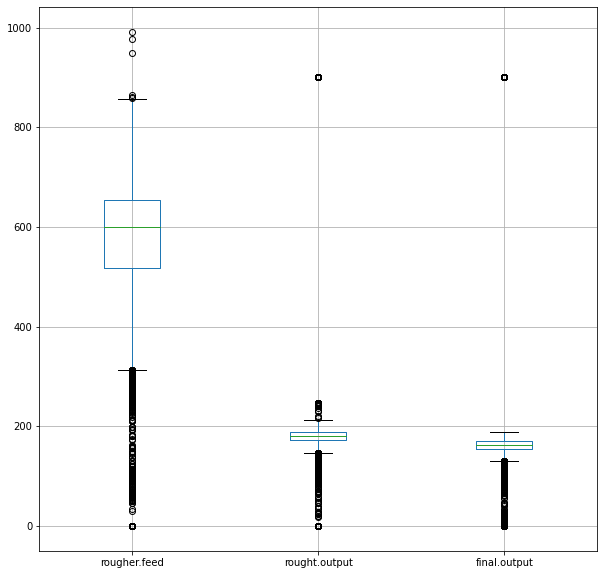

In [38]:
data_train[['rougher.feed', 'rought.output', 'final.output']].boxplot(figsize=(10,10))
plt.show

In [39]:
def down_limit(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr= q3-q1
    down= q1-(1.5*iqr)
    return down
    
def up_limit(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr= q3-q1
    up= q3+(1.5*iqr)
    return up   

<function matplotlib.pyplot.show(close=None, block=None)>

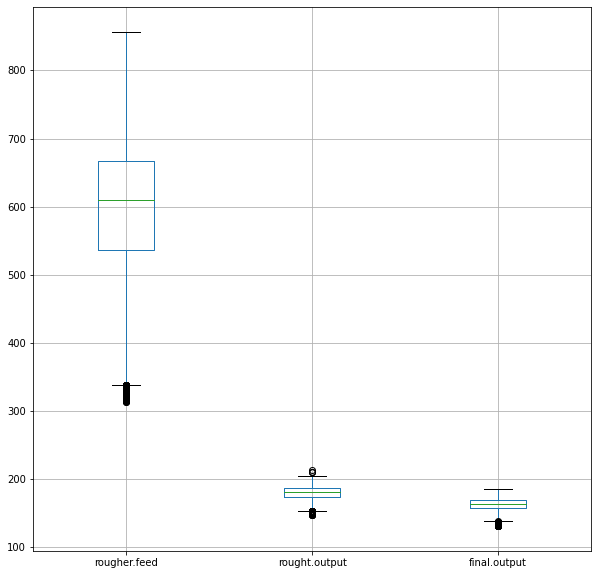

In [40]:
data_train= data_train[
    (down_limit(data_train['rougher.feed']) <= data_train['rougher.feed'])
    &(data_train['rougher.feed'] <= up_limit(data_train['rougher.feed']))
    &(down_limit(data_train['rought.output']) <= data_train['rought.output'])
    &(data_train['rought.output'] <= up_limit(data_train['rought.output']))
    &(down_limit(data_train['final.output']) <= data_train['final.output'])
    &(data_train['final.output'] <= up_limit(data_train['final.output']))
].reset_index()

data_train[['rougher.feed', 'rought.output', 'final.output']].boxplot(figsize=(10,10))
plt.show

In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13567 entries, 0 to 13566
Data columns (total 93 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               13567 non-null  int64  
 1   date                                                13567 non-null  object 
 2   final.output.concentrate_ag                         13567 non-null  float64
 3   final.output.concentrate_pb                         13567 non-null  float64
 4   final.output.concentrate_sol                        13567 non-null  float64
 5   final.output.concentrate_au                         13567 non-null  float64
 6   final.output.recovery                               13567 non-null  float64
 7   final.output.tail_ag                                13567 non-null  float64
 8   final.output.tail_pb                                13567 non-null  float64


In [42]:
data_filtered_train = data_train[cols_inter]

data_filtered_train.head()

,primary_cleaner.input.depressant,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.state.floatbank8_c_air,rougher.state.floatbank10_c_air,rougher.state.floatbank10_e_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank5_a_level,primary_cleaner.input.feed_size,rougher.input.floatbank11_sulfate,...,secondary_cleaner.state.floatbank4_a_level,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank2_b_level,date
0,10.128295,-495.262817,1549.873901,1602.375000,1404.472046,25.853109,-499.340973,-498.310211,7.25,11.836743,...,-502.488007,-516.403442,2.284912,523.546326,55.486599,23.961798,12.099931,9.925633,-501.406281,2016-01-15 00:00:00
1,10.296251,-500.085473,1575.994189,1600.479580,1399.227084,25.880539,-499.446897,-500.169983,7.25,11.996163,...,-505.503262,-499.865889,2.266033,525.290581,57.278666,23.970550,11.950531,10.039245,-500.372428,2016-01-15 01:00:00
2,11.316280,-499.442343,1602.003542,1599.672797,1399.180945,26.005245,-499.901982,-500.129135,7.25,11.920305,...,-502.520901,-500.607762,2.159622,530.026610,57.510649,23.913535,11.912783,10.070913,-499.951928,2016-01-15 02:00:00
3,11.322140,-500.008812,1600.304144,1600.012842,1400.943157,25.942508,-499.944710,-499.201640,7.25,11.692450,...,-500.857308,-499.677094,2.037807,542.590390,57.792734,23.966838,11.999550,9.970366,-499.848796,2016-01-15 03:00:00
4,11.913613,-500.083811,1599.581894,1600.357732,1401.560902,26.024787,-499.990309,-501.686727,7.25,10.960521,...,-499.838632,-500.323246,1.786875,540.531893,56.047189,23.985703,11.953070,9.925709,-500.593614,2016-01-15 04:00:00


In [43]:
data_filtered_test.head()

,primary_cleaner.input.depressant,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.state.floatbank8_c_air,rougher.state.floatbank10_c_air,rougher.state.floatbank10_e_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank5_a_level,primary_cleaner.input.feed_size,rougher.input.floatbank11_sulfate,...,secondary_cleaner.state.floatbank4_a_level,primary_cleaner.state.floatbank8_b_level,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank2_b_level,date
0,14.993118,-450.395995,1400.102998,1249.750520,999.472250,24.938200,-449.831513,-432.317850,8.080000,16.867518,...,-497.795834,-499.919735,5.636710,489.793655,62.710452,20.018166,8.016656,7.946562,-500.013837,2016-09-01 00:59:59
1,14.987471,-450.114024,1396.151033,1249.514451,1000.002114,24.923466,-450.059163,-525.839648,8.080000,16.996063,...,-498.695773,-499.778182,5.526065,490.104534,61.961163,19.988503,8.130979,7.958270,-500.764452,2016-09-01 01:59:59
2,12.884934,-450.263164,1398.075709,1248.207204,999.925519,24.908732,-449.660997,-500.801673,7.786667,16.982096,...,-498.767484,-499.764529,5.426561,489.617969,66.903807,20.039689,8.096893,8.071056,-500.993821,2016-09-01 02:59:59
3,12.006805,-449.372570,1400.129303,1250.493702,1001.930679,24.893998,-449.526900,-500.868509,7.640000,16.515277,...,-498.350935,-499.211024,5.114758,476.618130,59.865919,20.031100,8.074946,7.897085,-499.862299,2016-09-01 03:59:59
4,10.682530,-450.638828,1402.172226,1306.455515,1058.839106,24.886905,-450.022259,-509.526725,7.530000,13.650053,...,-500.786497,-499.504543,4.767383,488.248117,63.315324,19.962364,8.054678,8.107890,-500.186804,2016-09-01 04:59:59


[Back to Contents](#back)

## 5. Prediction model evaluation<a id='model_evaluation'></a>

### Model construction

A function is designed to compute the final value of sMAPE

In [44]:
def smape_final(target, predictions):
    
    smape_rougher=np.mean((np.abs(target.iloc[:,0]-predictions[:,0]) / (
        (np.abs(target.iloc[:,0])+(np.abs(predictions[:,0])))/2)))*100
    
    smape_fin= np.mean((np.abs(target.iloc[:,1]-predictions[:,1]) / (
        (np.abs(target.iloc[:,1])+(np.abs(predictions[:,1])))/2)))*100

    fin_smape=(0.25*smape_rougher)+(0.75*smape_fin)

    return fin_smape

smape_score= make_scorer(smape_final, greater_is_better= False)


In [45]:
# The data is segmented to make the training and validation set.

features_tr= data_filtered_train.drop(['rougher.output.recovery', 'final.output.recovery','date'], axis=1)
target_tr= data_filtered_train[['rougher.output.recovery', 'final.output.recovery']]

features_tr_train, features_tr_valid, target_tr_train, target_tr_valid = train_test_split(
    features_tr, target_tr, test_size=0.25, random_state=12345) 

In [46]:
# The first decision tree model is tested first.

for depth_tree in range (1,11):
    model_tree= DecisionTreeRegressor(max_depth=depth_tree, random_state=12345)
    tree_score= cross_val_score(model_tree, features_tr, target_tr, scoring= smape_score, cv=5)

    print(' Para el modelo de árbol de decisión tenemos Depth: ', depth_tree, 'sMAPE score: ', abs(tree_score.mean()))

 Para el modelo de árbol de decisión tenemos Depth:  1 sMAPE score:  8.57244468445361
 Para el modelo de árbol de decisión tenemos Depth:  2 sMAPE score:  8.076684619256515
 Para el modelo de árbol de decisión tenemos Depth:  3 sMAPE score:  8.232884216884967
 Para el modelo de árbol de decisión tenemos Depth:  4 sMAPE score:  8.444575816550984
 Para el modelo de árbol de decisión tenemos Depth:  5 sMAPE score:  9.465926723542761
 Para el modelo de árbol de decisión tenemos Depth:  6 sMAPE score:  9.741437219229502
 Para el modelo de árbol de decisión tenemos Depth:  7 sMAPE score:  10.496423100296017
 Para el modelo de árbol de decisión tenemos Depth:  8 sMAPE score:  10.747541997984243
 Para el modelo de árbol de decisión tenemos Depth:  9 sMAPE score:  10.907351668973082
 Para el modelo de árbol de decisión tenemos Depth:  10 sMAPE score:  12.109332806696122


In [47]:
# The random forest model is now tested.

for depth_forest in range (1,11):
    model_forest= RandomForestRegressor(n_estimators=20, max_depth=depth_forest, random_state=12345)
    forest_score= cross_val_score(model_forest, features_tr, target_tr, scoring= smape_score, cv=5)

    print('Para el modelo de bosque aleatorio tenemos Depth: ', depth_forest, 'sMAPE score: ', abs(forest_score.mean()))

Para el modelo de bosque aleatorio tenemos Depth:  1 sMAPE score:  8.451543075302439
Para el modelo de bosque aleatorio tenemos Depth:  2 sMAPE score:  8.049325152580973
Para el modelo de bosque aleatorio tenemos Depth:  3 sMAPE score:  7.9363895179485935
Para el modelo de bosque aleatorio tenemos Depth:  4 sMAPE score:  8.333989119301677
Para el modelo de bosque aleatorio tenemos Depth:  5 sMAPE score:  8.796940573054536
Para el modelo de bosque aleatorio tenemos Depth:  6 sMAPE score:  8.75587019809005
Para el modelo de bosque aleatorio tenemos Depth:  7 sMAPE score:  8.90398806038026
Para el modelo de bosque aleatorio tenemos Depth:  8 sMAPE score:  9.034273338711042
Para el modelo de bosque aleatorio tenemos Depth:  9 sMAPE score:  9.12737269664441
Para el modelo de bosque aleatorio tenemos Depth:  10 sMAPE score:  9.295298157324646


In [48]:
model_lineal = LinearRegression()  
linear_score= cross_val_score(model_lineal, features_tr, target_tr, scoring= smape_score, cv=5)
print ('El valor de SMAPE score del modelo de regresión linear es: ', abs(linear_score.mean()))

El valor de SMAPE score del modelo de regresión linear es:  8.8939869605492


As we can see that the best result we can observe is in the random forest model with Depth= 3.
 
 [Back to Contents](#back)

## 6. Model with test set <a id='test_set'></a>

The model is tested with the test set

In [49]:
# Considering the parameters, we build the model and train it with the training data.
best_model = RandomForestRegressor(random_state=12345 , n_estimators=50, max_depth=3)

best_model.fit(features_tr_train, target_tr_train)

RandomForestRegressor(max_depth=3, n_estimators=50, random_state=12345)

In [50]:
# Considerando ya los parámetros armamos el modelo y lo entrenamos ocn los datos de entrenamiento

features_test= data_filtered_test.drop(['rougher.output.recovery', 'final.output.recovery','date'], axis=1)
target_test= data_filtered_test[['rougher.output.recovery', 'final.output.recovery']]

test_predictions = best_model.predict(features_test)

# Predictions are added to the test dataset.

data_filtered_test[['predictions_test_rougher', 'predictions_test_final']]=pd.DataFrame(test_predictions)
target_test=pd.DataFrame(target_test)

print('Predicciones:', test_predictions)
print('Respuestas correctas:', target_test)

Predicciones: [[84.99671149 68.53632263]
 [85.15189725 68.74933633]
 [85.15189725 68.74933633]
 ...
 [91.35143636 73.24428745]
 [91.35143636 73.24428745]
 [91.35143636 73.24428745]]
Respuestas correctas:       rougher.output.recovery  final.output.recovery
0                   89.993421              70.273583
1                   88.089657              68.910432
2                   88.412756              68.143213
3                   87.360133              67.776393
4                   83.236367              61.467078
...                       ...                    ...
5851                95.172585              68.919891
5852                94.575036              68.440582
5853                93.018138              67.092759
5854                92.599042              68.061186
5855                91.177695              71.699976

[5856 rows x 2 columns]


In [51]:

data_filtered_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   primary_cleaner.input.depressant            5856 non-null   float64       
 1   secondary_cleaner.state.floatbank3_a_level  5856 non-null   float64       
 2   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64       
 3   rougher.state.floatbank10_c_air             5856 non-null   float64       
 4   rougher.state.floatbank10_e_air             5856 non-null   float64       
 5   secondary_cleaner.state.floatbank2_a_air    5856 non-null   float64       
 6   secondary_cleaner.state.floatbank3_b_level  5856 non-null   float64       
 7   secondary_cleaner.state.floatbank5_a_level  5856 non-null   float64       
 8   primary_cleaner.input.feed_size             5856 non-null   float64       
 9   rougher.

In [52]:
best_result_test = 10000
 
result_forest_test = mean_squared_error(target_test, test_predictions)**0.5 

if result_forest_test < best_result_test:
    best_result = result_forest_test


print("RECM del modelo para  el conjunto de prueba es: ", best_result)


RECM del modelo para  el conjunto de prueba es:  12.572578769179676


In [53]:
mae(target_test, test_predictions)

6.35095258678545

[Back to Contents](#back)

## Conclusions <a id='end'></a> 

Initially the data for all the segments were reviewed, initially it was noted that there was missing data, which was filled in with , in the description of the data they indicate that parameters close in time are usually similar, so I wanted to ask you if you think it would be ok for me to fill in the missing data with the previous data, if the parameters are similar in time. Subsequently it was observed that in both the training data set and the test data set there were different numbers of columns, which could be a problem when using a model, since it is going to be based on the information that comes in the training data set and if it varies from the test data set an error would be generated, so it was decided to only use the columns that came in both sets, using the intersection function. 

Similarly, it was found that there were outliers in the filtered training DataFrames, so these data were eliminated to make the model training more accurate.

Once the data was reviewed and analyzed, the calculation was performed to determine the gold recovery was correct when compared to 'rougher.output.recovery' with a relatively low EMA and close to zero.

We can observe that depending on the purification stages the average concentration of gold varies, increasing the concentration of this metal the further the purification process advances, compared to the recovery of the other metals, so we can deduce that at the end of the purification process a higher amount of gold concentration is obtained. 

Different models were tested by means of cross-valuation, obtaining better results and predictions with lower errors with the random forest model, using the final sMAPE metric as the error parameter.


[Back to Contents](#back)